# Text dataset creation and design of Simple RNN for Sentiment Analysis

### 1. Import libraries

In [ ]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

### 2. Creation of data

In [ ]:
df = pd.read_csv("data.csv",encoding="ISO-8859-1")

FileNotFoundError: ignored

In [ ]:
df.head()

NameError: ignored

### 3. Opening your CSV file

In [ ]:
import csv

In [ ]:
file = open('data.csv')

type(file)

In [ ]:
csvreader = csv.reader(file)

In [ ]:
header = []
header = next(csvreader)
header

In [ ]:
rows = []
for row in csvreader:
        rows.append(row)
rows

In [ ]:
file.close()

In [ ]:
df.info()

### 4. Pre-processing the text

In [ ]:
y = df['Labels']
X = df['Quotes']

NameError: ignored

### 5. Dataset Preparation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

NameError: ignored

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

NameError: ignored

In [ ]:
# 4th step to be continue
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

NameError: ignored

In [ ]:
vocab = len(train_token.word_index) + 1
vocab

NameError: ignored

In [ ]:
train_sequence[3]

NameError: ignored

In [ ]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')

NameError: ignored

In [ ]:
train_padded[5]

NameError: ignored

In [ ]:
train_padded.shape

NameError: ignored

In [ ]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_val)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_val)

NameError: ignored

In [ ]:
val_sequence[4]

NameError: ignored

In [ ]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

NameError: ignored

In [ ]:
val_padded[4]

NameError: ignored

### 6. Model Creation

In [ ]:
model = Sequential()
# Embedding layer
model.add(Embedding(300,70,input_length=100))
model.add(SimpleRNN(70,activation='relu'))
model.add(Dense('1',activation='sigmoid'))

NameError: ignored

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

NameError: ignored

In [ ]:
model.summary()

NameError: ignored

In [ ]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

NameError: ignored

In [ ]:
model.evaluate(val_padded,y_val)

NameError: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

NameError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

NameError: ignored

In [ ]:
text = df["Quotes"]

NameError: ignored

In [ ]:
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')

NameError: ignored

In [ ]:
trail_pad

NameError: ignored

### Step-7:

In [ ]:
res = model.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

NameError: ignored

### Step-8:

### Model 2

In [ ]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))
model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))
model1.add(Dense('1',activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 embedding_2 (Embedding)     (None, 32, 32)            160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485,217
Trainable params: 485,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.7417 - accuracy: 0.4286 - 662ms/epoch - 662ms/step
Epoch 2/10
1/1 - 0s - loss: 0.7241 - accuracy: 0.4286 - 5ms/epoch - 5ms/step
Epoch 3/10
1/1 - 0s - loss: 0.7114 - accuracy: 0.4286 - 6ms/epoch - 6ms/step
Epoch 4/10
1/1 - 0s - loss: 0.7019 - accuracy: 0.4286 - 5ms/epoch - 5ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6944 - accuracy: 0.4286 - 5ms/epoch - 5ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6888 - accuracy: 0.5714 - 5ms/epoch - 5ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6852 - accuracy: 0.5714 - 5ms/epoch - 5ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6834 - accuracy: 0.5714 - 5ms/epoch - 5ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6829 - accuracy: 0.5714 - 5ms/epoch - 5ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6830 - accuracy: 0.5714 - 5ms/epoch - 5ms/step


In [ ]:
model1.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 171ms/step - loss: 0.7659 - accuracy: 0.3333


[0.765855073928833, 0.3333333432674408]

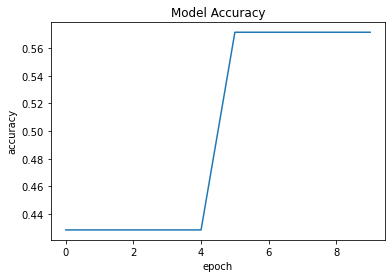

In [ ]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

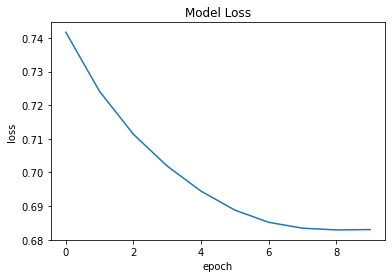

In [ ]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 134ms/step
[[0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.5857922 ]
 [0.58579224]
 [0.58579224]] negative


C:\Users\online.CSCENTER\AppData\Local\Temp\ipykernel_8432\2701450631.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 3

In [ ]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))
model2.add(Dense('1',activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          512000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_4 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_5 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6897 - accuracy: 0.5714 - 755ms/epoch - 755ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6834 - accuracy: 0.5714 - 11ms/epoch - 11ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6858 - accuracy: 0.5714 - 11ms/epoch - 11ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6842 - accuracy: 0.5714 - 11ms/epoch - 11ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6829 - accuracy: 0.5714 - 10ms/epoch - 10ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6838 - accuracy: 0.5714 - 10ms/epoch - 10ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6838 - accuracy: 0.5714 - 10ms/epoch - 10ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6832 - accuracy: 0.5714 - 10ms/epoch - 10ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6829 - accuracy: 0.5714 - 11ms/epoch - 11ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6830 - accuracy: 0.5714 - 10ms/epoch - 10ms/step


In [ ]:
model2.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 224ms/step - loss: 0.7592 - accuracy: 0.3333


[0.7591899037361145, 0.3333333432674408]

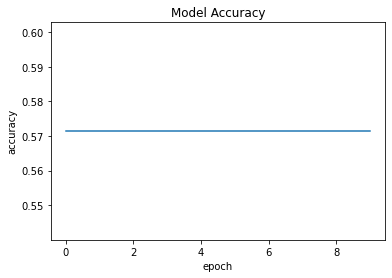

In [ ]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

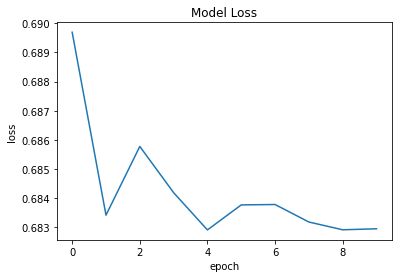

In [ ]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 191ms/step
[[0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.57928824]
 [0.5792881 ]
 [0.5792881 ]] negative


C:\Users\online.CSCENTER\AppData\Local\Temp\ipykernel_8432\479605851.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])
